<a href="https://colab.research.google.com/github/aashishpiitk/from-Scratch/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
data=np.loadtxt(fname="linear_data.txt",delimiter=",")
print(data.shape)
X_train=data[0:80,0].reshape(-1,1)
Y_train=data[0:80,1].reshape(-1,1)
X_test=data[80:100,0].reshape(-1,1)
Y_test=data[80:100,1].reshape(-1,1)
print(X_train.shape,Y_test.shape)

(97, 2)
(80, 1) (17, 1)


In [0]:
def plot_figure(J):
  plt.plot(J)
  plt.show()

In [0]:
def linearCost(X,y,theta,lamda=0.001,regularisation=False):
    [m,n]=X.shape
    H=np.dot(X,theta)
    error=H-y#(m,1)


    J=(1/(2*m))*sum(np.multiply(error,error))
    J_regularisation=(lamda/(2*m))*(np.squeeze(np.dot(error.T,error)))
    
    
    grad=np.multiply((1/m),(np.dot(X.T,error)))
    grad_regularisation=(lamda/m)*(theta)#theta is (1,1)
    
    if(regularisation):
      J+=J_regularisation
      grad+=grad_regularisation
    
    return [J,grad]

In [0]:
def gradient_descent(X,y,theta,alpha,num_iterations,lamda):
    print("training the neural network")
    J_history=np.zeros([num_iterations,1])
    for i in range(num_iterations):
        a=linearCost(X,y,theta,lamda,regularisation=False)
        J_history[i]=a[0]
        if(i%100==0):
          print("cost after {} iteration is {}".format(i,np.squeeze(a[0])))
        grad=a[1]
        theta=theta-np.multiply(grad,alpha)
    return theta,J_history

In [0]:
def linear_regression(X_train,X_test,y,alpha,num_iterations,lamda):
    X=X_train
    on=np.ones([X.shape[0],1])
    X=np.append(on,X,axis=1)
    [m,n]=X.shape
    theta=np.random.randn(X.shape[1],1)
    theta,J_history=gradient_descent(X,y,theta,alpha,num_iterations,lamda)#n+1 * 1
    temp=np.ones([X_test.shape[0],1])
    X_test=np.append(temp,X_test,axis=1)
    predict=np.dot(X_test,theta)
    return predict,theta,J_history

In [0]:
def accurancy(predict,Y_test):
  p=np.squeeze(predict-Y_test)
  l=p.shape[0]
  norm=np.linalg.norm(p)
  p=p/norm
  error=np.sqrt(np.sum(np.multiply(p,p))/l)
  return (1-error)*100

training the neural network
cost after 0 iteration is 272.0563710057641
cost after 100 iteration is 52.300682323664915
cost after 200 iteration is 14.805821852343072
cost after 300 iteration is 8.402302354889025
cost after 400 iteration is 7.302586798342833
cost after 500 iteration is 7.107658611371504
cost after 600 iteration is 7.067103009699095
cost after 700 iteration is 7.052908943400197
cost after 800 iteration is 7.043239297754664
cost after 900 iteration is 7.034368842817412


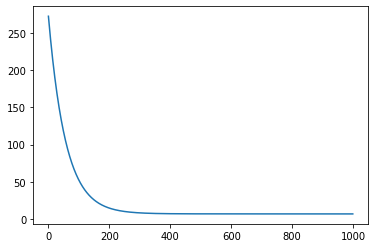

Accurancy is : 75.74643749636671 %


In [0]:
predict,theta,J_history=linear_regression(X_train,X_test,Y_train,0.0001,1000,0.001)
plot_figure(J_history)
#print(predict.shape)
print("Accurancy is :",accurancy(predict,Y_test),"%")
#print(np.squeeze(predict-Y_test))